# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos. 


## Descarga e instalación de librerías

Lo primero que se hará es descargar la librería **[regressors](https://pypi.org/project/regressors/)** que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [42]:
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid', context='notebook')

## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [43]:
df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<Axes: >

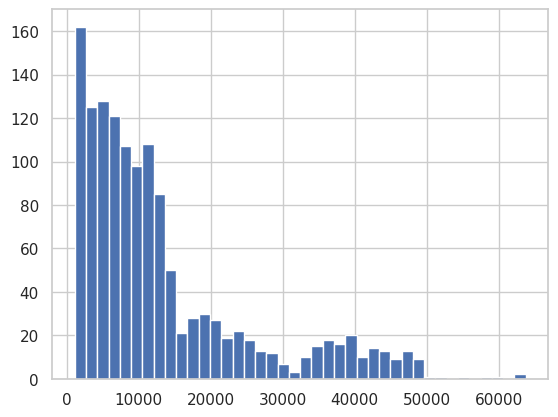

In [44]:
print(df.shape)
df.charges.hist(bins=40)


Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [45]:
df[df.charges > 50000]
df = df[df.charges < 50000]
print(df.shape)

(1331, 7)


En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio. 

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan. 

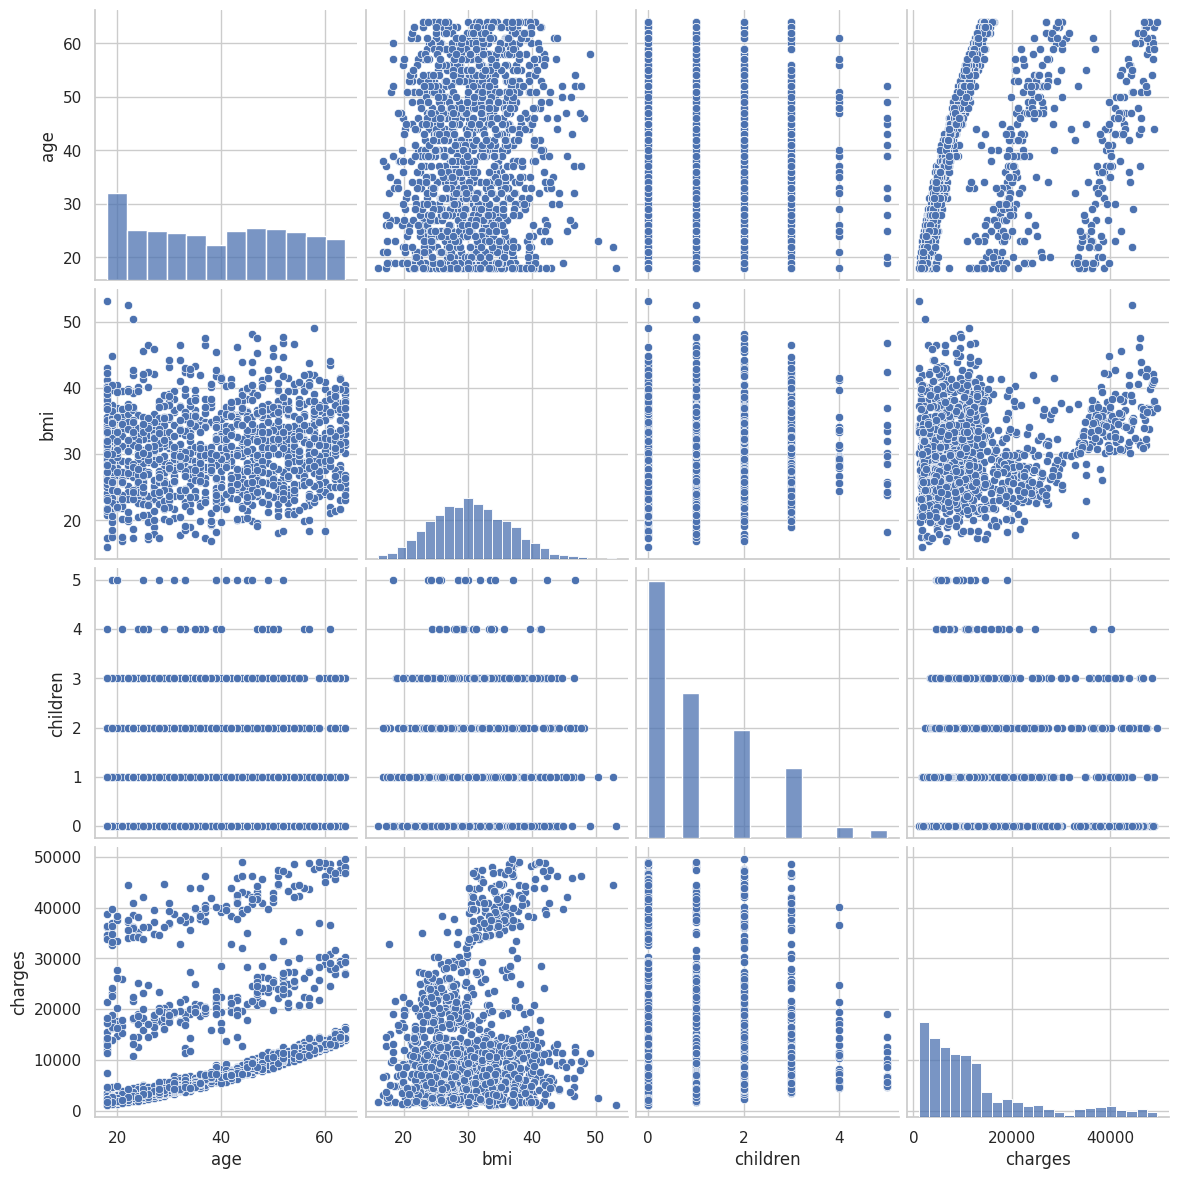

In [46]:
import matplotlib.pyplot as plt
sns.pairplot(df, height=3)
plt.show()

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

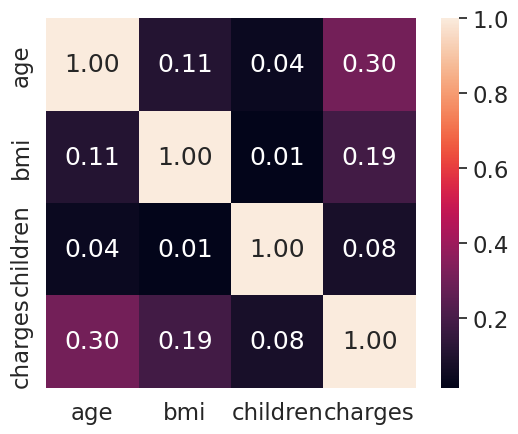

In [47]:
import numpy as np
numeric_cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set_theme(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
            yticklabels=numeric_cols, xticklabels=numeric_cols)
plt.show()

## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas. 

Ahora la verás en acción

In [48]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Creando modelos 
Primero se usará un modelo con todas las variables.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
# --- 1. SELECCIÓN DE CARACTERÍSTICAS (FEATURES) Y VARIABLE OBJETIVO (TARGET) ---

# Crea una lista llamada 'X_cols' que contendrá los nombres de las columnas usadas como variables predictoras.
# Para ello, toma todas las columnas de tu DataFrame 'df' (df.columns),
# les resta la columna 'charges' (la variable que queremos predecir), y convierte el resultado en una lista.
X_cols = list(set(df.columns) - set(['charges']))

# Define una lista 'y_col' que contiene únicamente el nombre de la columna objetivo.
y_col = ['charges']


# --- 2. PREPARACIÓN DE LOS DATOS EN ARREGLOS DE NUMPY ---

# Crea la matriz de características 'X'.
# Selecciona las columnas especificadas en 'X_cols' del DataFrame 'df'
# y convierte sus valores a un arreglo de NumPy con '.values'.
X = df[X_cols].values

# Crea el vector objetivo 'y'.
# Selecciona la columna 'charges' del DataFrame 'df' y convierte sus valores a un arreglo de NumPy.
y = df[y_col].values


# --- 3. DIVISIÓN DE DATOS EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA ---

# Divide los datos 'X' e 'y' en cuatro conjuntos.
# Generalmente, se usa un 75% para entrenamiento y un 25% para prueba (configuración por defecto).
# X_train, y_train: Datos para entrenar el modelo.
# X_test, y_test: Datos para evaluar el rendimiento del modelo en información que no ha visto antes.
X_train, X_test, y_train, y_test = train_test_split(X, y)


# --- 4. ESTANDARIZACIÓN DE LOS DATOS ---
# La estandarización transforma los datos para que tengan una media de 0 y una desviación estándar de 1.
# Es un paso importante para muchos algoritmos de machine learning.

# Crea un objeto StandardScaler para las características 'X' y lo "ajusta" (fit) con TODOS los datos de X.
# El método .fit() calcula la media y la desviación estándar que se usarán para la transformación.
# **NOTA IMPORTANTE:** Una práctica más rigurosa es ajustar el escalador SÓLO con los datos de entrenamiento (sc_x.fit(X_train))
# para evitar "filtrar" información del conjunto de prueba al de entrenamiento (un problema conocido como data leakage).
sc_x = StandardScaler().fit(X)

# Crea y ajusta un objeto StandardScaler para la variable objetivo 'y'.
sc_y = StandardScaler().fit(y)

# Aplica la transformación de estandarización a los conjuntos de datos.
# Se usa '.transform()' para aplicar la escala calculada en el paso anterior.

# Estandariza las características de entrenamiento.
X_train_std = sc_x.transform(X_train)
# Estandariza la variable objetivo de entrenamiento.
y_train_std = sc_y.transform(y_train)
# Estandariza las características de prueba (usando la misma escala que para el entrenamiento).
X_test_std = sc_x.transform(X_test)
# Estandariza la variable objetivo de prueba.
y_test_std = sc_y.transform(y_test)


# --- 5. ENTRENAMIENTO DEL MODELO Y PREDICCIÓN ---

# Crea una instancia del modelo de Regresión Lineal.
model = LinearRegression()

# Entrena el modelo usando los datos de entrenamiento ESTANDARIZADOS.
# El modelo aprende la relación lineal entre 'X_train_std' y 'y_train_std'.
model.fit(X_train_std, y_train_std)

# Utiliza el modelo ya entrenado para hacer predicciones sobre el conjunto de prueba ESTANDARIZADO.
# El resultado 'y_pred_std' contendrá las predicciones, pero en la misma escala estandarizada.
# Para ver los valores en la escala original, necesitarías aplicar la transformación inversa: sc_y.inverse_transform(y_pred_std)
y_pred_std = model.predict(X_test_std)


## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [71]:
import sklearn.metrics as sm
mse = sm.mean_squared_error(y_test_std, y_pred_std)
rmse = np.sqrt(mse)
mae = sm.mean_absolute_error(y_test_std, y_pred_std)
r2 = sm.r2_score(y_test_std, y_pred_std)
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'R2: {r2:.3f}')





MSE: 0.283
RMSE: 0.532
MAE: 0.380
R2: 0.728


El siguiente código muestra un resumen general de los resultados.

Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

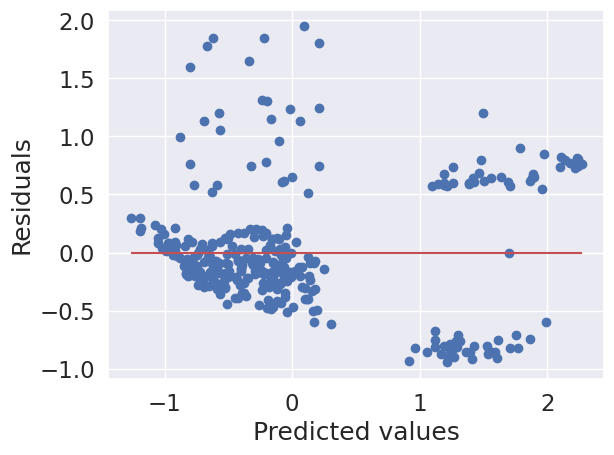

In [ ]:
residuals = y_test_std - y_pred_std
plt.scatter(y_pred_std, residuals) 
plt.hlines(y=0, xmin=min(y_pred_std), xmax=max(y_pred_std), colors='r')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()



## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

Analizando el segundo modelo